In [136]:
from warnings import simplefilter
from ANN.ANN_Models import *
from ANN.dataloader import *
from ANN.Trainer import *
import matplotlib.pyplot as plt
import numpy as np
import torch

simplefilter("ignore")

In [137]:
na = 10
nb = 2
data = DATA(na,nb)
u_val = data.testsim.u.to_numpy()
th_val = data.testsim.th.to_numpy()

In [138]:
model = NARX(8).double

In [150]:
for i in range(data.testsim.__len__() - max(na,nb)):
    int_val = data.testsim.iloc[i:i+max(na, nb)].to_numpy()
    print(int_val[:,1])
    if i==20:
        break
    input_data = torch.tensor(np.append(int_val[-2:,0], int_val[:,1])).double()
    with torch.no_grad():
        output = model()(input_data)
        data.testsim.iloc[i+max(na,nb)]["th"] = output.item()

[ 0.23876104  0.37699112  0.4712389   0.49951323  0.45553093  0.3424336
  0.1727876  -0.0408407  -0.27331856 -0.49008845]
[ 0.37699112  0.4712389   0.49951323  0.45553093  0.3424336   0.1727876
 -0.0408407  -0.27331856 -0.49008845  0.19622921]
[ 0.4712389   0.49951323  0.45553093  0.3424336   0.1727876  -0.0408407
 -0.27331856 -0.49008845  0.19622921  0.20120552]
[ 0.49951323  0.45553093  0.3424336   0.1727876  -0.0408407  -0.27331856
 -0.49008845  0.19622921  0.20120552  0.19847805]
[ 0.45553093  0.3424336   0.1727876  -0.0408407  -0.27331856 -0.49008845
  0.19622921  0.20120552  0.19847805  0.19612298]
[ 0.3424336   0.1727876  -0.0408407  -0.27331856 -0.49008845  0.19622921
  0.20120552  0.19847805  0.19612298  0.20028243]
[ 0.1727876  -0.0408407  -0.27331856 -0.49008845  0.19622921  0.20120552
  0.19847805  0.19612298  0.20028243  0.194837  ]
[-0.0408407  -0.27331856 -0.49008845  0.19622921  0.20120552  0.19847805
  0.19612298  0.20028243  0.194837    0.19152718]
[-0.27331856 -0.490

In [146]:
np.savetxt("testsimpred.csv", data.testsim.th.to_numpy(), delimiter=',')

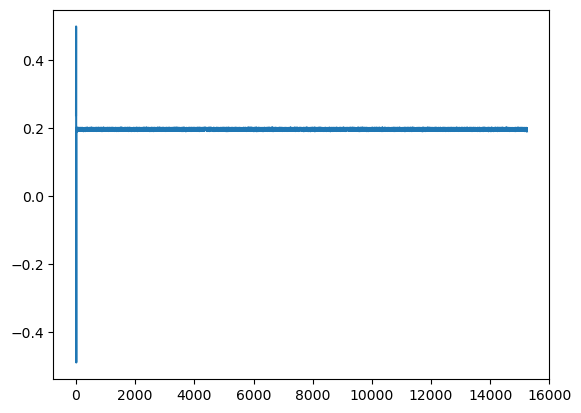

In [147]:
plt.plot(data.testsim.th)